In [26]:
import tarfile
my_tar = tarfile.open('yelp_dataset.tar')
my_tar.extractall('./data') # specify which folder to extract to
my_tar.close()


0
1000


In [41]:
import json
import pandas as pd

# We only use the first 100,000 data in this assignment
users = []
with open('yelp_academic_dataset_review.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 100:
            break
df = pd.DataFrame(users)
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,-MhfebM0QIsKt87iDN-FNw,0,2015-04-15 05:21:16,0,xQY8N_XvtGbearJ5X4QryQ,2.0,"As someone who has worked with many museums, I...",5,OwjRMXRC0KyPrIlcjaXeFQ
1,lbrU8StCq3yDfr-QMnGrmQ,0,2013-12-07 03:16:52,1,UmFMZ8PyXZTY2QcwzsfQYA,1.0,I am actually horrified this place is still in...,1,nIJD_7ZXHq-FX8byPMOkMQ
2,HQl28KMwrEKHqhFrrDqVNQ,0,2015-12-05 03:18:11,0,LG2ZaYiOgpr2DK_90pYjNw,5.0,I love Deagan's. I do. I really do. The atmosp...,1,V34qejxNsCbcgD8C0HVk-Q
3,5JxlZaqCnk1MnbgRirs40Q,0,2011-05-27 05:30:52,0,i6g_oA9Yf9Y31qt0wibXpw,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0,ofKDkJKXSKZXu5xJNGiiBQ
4,IS4cv902ykd8wj1TR0N3-A,0,2017-01-14 21:56:57,0,6TdNDKywdbjoTkizeMce8A,4.0,"Oh happy day, finally have a Canes near my cas...",0,UgMW8bLE0QMJDCkQ1Ax5Mg


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
business_id    100 non-null object
cool           100 non-null int64
date           100 non-null object
funny          100 non-null int64
review_id      100 non-null object
stars          100 non-null float64
text           100 non-null object
useful         100 non-null int64
user_id        100 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 7.1+ KB


In [43]:
fun = df['funny'] 
sorted(fun.unique())
# [1.0, 2.0, 3.0, 4.0, 5.0]

[0, 1, 2, 3, 4, 5, 19]

In [44]:
import seaborn as sns

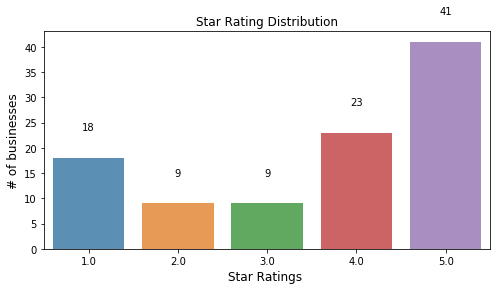

In [45]:
#Get the distribution of the ratings
x=df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

(array([11.,  1.,  1.,  1.,  1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

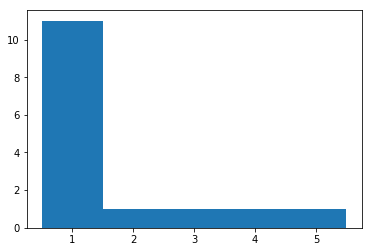

In [46]:
plt.hist(fun, range=(0.5, 5.5), bins=5)

(array([ 6., 10.,  3.,  7.,  6.,  6.,  6.,  1.,  1.,  5.,  4.,  2.,  3.,
         3.,  1.,  2.,  0.,  3.,  3.,  2.,  2.,  1.,  3.,  2.,  3.,  0.,
         1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,
         1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  89.  ,  123.11,  157.22,  191.33,  225.44,  259.55,  293.66,
         327.77,  361.88,  395.99,  430.1 ,  464.21,  498.32,  532.43,
         566.54,  600.65,  634.76,  668.87,  702.98,  737.09,  771.2 ,
         805.31,  839.42,  873.53,  907.64,  941.75,  975.86, 1009.97,
        1044.08, 1078.19, 1112.3 , 1146.41, 1180.52, 1214.63, 1248.74,
        1282.85, 1316.96, 1351.07, 1385.18, 1419.29, 1453.4 , 1487.51,
        

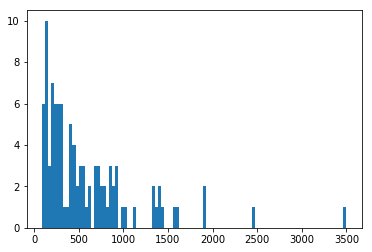

In [47]:
plt.clf() # clear previous figure
plt.hist(df['text'].str.len(), bins=100)

In [48]:
df.loc[ df['text'].str.len() == df['text'].str.len().max() ]  

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
32,LkMtMHVetws5_7QfRjPtlg,4,2011-01-09 00:09:50,3,NHQWhZve7UEaGLt7IwAyDw,2.0,This actually used to be one of my favorite ho...,5,H3wPBzQCKCKiHcV7GZK4kg


In [49]:
print(df.loc[1].text)

I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn't. So the older black male stylist finishes the haircut he was doing and it's our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn't cut hair, it just rubs against it. How does this man who has an alleged cosmetolog